In [13]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('noise_0806.csv')

# Convert the "Time" column to the "day/month/year hour:minute:second" format
df['Time'] = pd.to_datetime(df['Time'], format='%d/%m/%Y %H:%M')

# Get the list of room names (excluding the "Time" column)
rooms = df.columns[1:]

# For each room, check for outliers and replace them
for room in rooms:
    # Condition to find values less than 40 or greater than 100
    condition = (df[room] < 40) | (df[room] > 100)
    # Use loc to replace outlier values with 39
    df.loc[condition, room] = 39

# Save the cleaned data to a new CSV file
df.to_csv('cleaned_noise_0806.csv', index=False)

print(df)


                    Time  Room1  Room3  Room2
0    2023-06-01 13:00:00   39.0   50.7   54.7
1    2023-06-01 14:00:00   39.0   51.0   56.9
2    2023-06-01 15:00:00   39.0   51.5   54.6
3    2023-06-01 16:00:00   39.0   51.3   52.8
4    2023-06-01 17:00:00   39.0   50.6   55.2
...                  ...    ...    ...    ...
1506 2023-08-03 09:00:00   39.0   48.0   46.5
1507 2023-08-03 10:00:00   39.0   50.8   57.5
1508 2023-08-03 11:00:00   39.0   51.2   45.5
1509 2023-08-03 12:00:00   39.0   50.6   47.8
1510 2023-08-03 12:39:00   42.0   53.0   49.5

[1511 rows x 4 columns]


In [14]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('cleaned_noise_0806.csv')

# Fill NaN values using fillna, using 0 as the fill value
df['Room1'].fillna(0, inplace=True)
df['Room2'].fillna(0, inplace=True)
df['Room3'].fillna(0, inplace=True)

# Round specified columns and convert to integers using round() and astype()
df['Room1'] = df['Room1'].round().astype(int)
df['Room2'] = df['Room2'].round().astype(int)
df['Room3'] = df['Room3'].round().astype(int)

# Save the modified CSV file
df.to_csv('cleaned_noise_0806_rounded.csv', index=False)



In [17]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('cleaned_noise_0806_rounded.csv')

# Convert the 'Time' column to datetime format, handling errors by coercing invalid values to NaT
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

# Define the date range to be removed
start_date = '2023-07-31'
end_date = '2023-08-04'

# Use a condition to remove data for '2023-06-01' and the date range from '2023-07-31' to '2023-08-03'
df = df[~(df['Time'].dt.strftime('%Y-%m-%d').isin(['2023-06-01']) |
          (df['Time'] >= start_date) & (df['Time'] <= end_date))]

# Save the modified CSV file
df.to_csv('cleaned_noise_0806_rounded_drop.csv', index=False)





In [7]:
print(df)

                     Time  Room1  Room3  Room2
11    2023-02-06 00:00:00     39     50     53
12    2023-02-06 01:00:00     39     50     54
13    2023-02-06 02:00:00     39     51     52
14    2023-02-06 03:00:00     39     52     52
15    2023-02-06 04:00:00     39     49     54
...                   ...    ...    ...    ...
1506  2023-03-08 09:00:00     39     48     46
1507  2023-03-08 10:00:00     39     51     58
1508  2023-03-08 11:00:00     39     51     46
1509  2023-03-08 12:00:00     39     51     48
1510  2023-03-08 12:39:00     42     53     50

[1500 rows x 4 columns]


In [24]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('cleaned_noise_0806_rounded_drop.csv')

# Use melt to transform the data format
df_melted = df.melt(id_vars='Time', value_vars=['Room1', 'Room2', 'Room3'], 
                    var_name='Room', value_name='Value')

# Convert the 'Room' column to numeric values
df_melted['Room'] = df_melted['Room'].str.replace('Room', '').astype(int)

# Sort the data to maintain time continuity
df_melted.sort_values(by=['Time', 'Room'], inplace=True)

# Save the modified CSV file
df_melted.to_csv('nn_transformed.csv', index=False)



In [22]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('grouped_hourly_counts.csv')

# Use condition to filter out rows that start with '2023-06-01' in the 'hour' column
df = df[~df['hour'].str.startswith('2023-06-01')]

# Save the modified CSV file
df.to_csv('cleaned_grouped_hourly_counts.csv', index=False)



In [30]:
df =pd.read_csv('cleaned_grouped_hourly_counts.csv')
print(df)

      room                 hour  count_1s
0        1  2023-06-02 00:00:00         0
1        1  2023-06-02 01:00:00         0
2        1  2023-06-02 02:00:00         0
3        1  2023-06-02 03:00:00         0
4        1  2023-06-02 04:00:00         0
...    ...                  ...       ...
4243     3  2023-07-30 19:00:00         0
4244     3  2023-07-30 20:00:00         0
4245     3  2023-07-30 21:00:00         0
4246     3  2023-07-30 22:00:00         0
4247     3  2023-07-30 23:00:00         0

[4248 rows x 3 columns]


In [28]:
df =pd.read_csv('nn_transformed.csv')
print(df)


                     Time  Room  Value
0     2023-06-02 00:00:00     1     39
1     2023-06-02 00:00:00     2     53
2     2023-06-02 00:00:00     3     50
3     2023-06-02 01:00:00     1     39
4     2023-06-02 01:00:00     2     54
...                   ...   ...    ...
4237  2023-07-30 22:00:00     2     42
4238  2023-07-30 22:00:00     3     52
4239  2023-07-30 23:00:00     1     39
4240  2023-07-30 23:00:00     2     44
4241  2023-07-30 23:00:00     3     50

[4242 rows x 3 columns]


In [31]:
import pandas as pd

# Read two CSV files
df_base = pd.read_csv('cleaned_grouped_hourly_counts.csv')
df_nn = pd.read_csv('nn_transformed.csv')

# Merge the data using a left join
result = pd.merge(df_base, df_nn, left_on=['hour', 'room'], right_on=['Time', 'Room'], how='left')

# Drop the 'Time' and 'Room' columns as they are duplicated with 'hour' and 'room'
result = result.drop(columns=['Time', 'Room'])

# Save the result to a new CSV file
result.to_csv('merged_data.csv', index=False)


In [32]:
import pandas as pd

# Read the 'merged_data.csv' file
df_merged = pd.read_csv('merged_data.csv')

# Check if there are any null values in the DataFrame
has_null = df_merged.isnull().any().any()

# Print a message based on the presence of null values
if has_null:
    print("The file contains null values.")
else:
    print("The file does not contain any null values.")


The file contains null values.


In [34]:
import pandas as pd

# Read the 'merged_data.csv' file
df_merged = pd.read_csv('merged_data.csv')

# Fill missing values in the 'Value' column with 39 using the fillna() function
df_merged['Value'] = df_merged['Value'].fillna(39)

# Save the modified data to a new CSV file
df_merged.to_csv('merged_data_filled.csv', index=False)


In [35]:
df =pd.read_csv('merged_data_filled.csv')
print(df)


      room                 hour  count_1s  Value
0        1  2023-06-02 00:00:00         0   39.0
1        1  2023-06-02 01:00:00         0   39.0
2        1  2023-06-02 02:00:00         0   39.0
3        1  2023-06-02 03:00:00         0   39.0
4        1  2023-06-02 04:00:00         0   39.0
...    ...                  ...       ...    ...
4243     3  2023-07-30 19:00:00         0   52.0
4244     3  2023-07-30 20:00:00         0   51.0
4245     3  2023-07-30 21:00:00         0   46.0
4246     3  2023-07-30 22:00:00         0   52.0
4247     3  2023-07-30 23:00:00         0   50.0

[4248 rows x 4 columns]


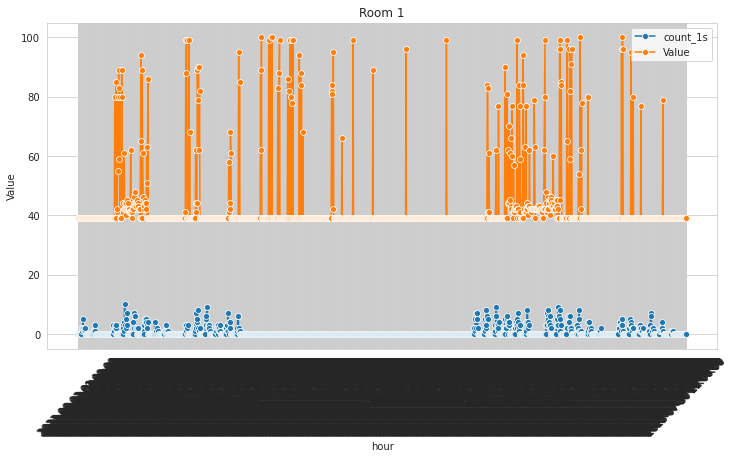

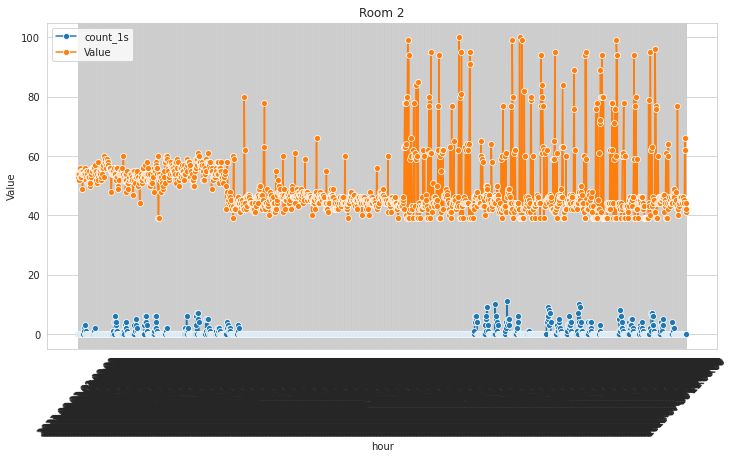

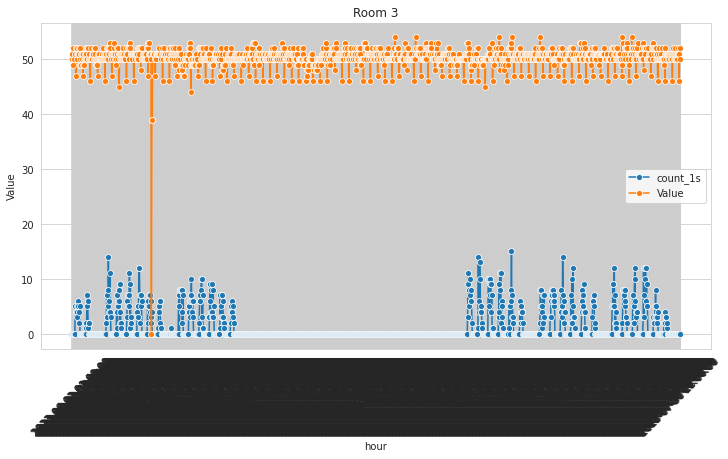